In [1]:
import pandas as pd
import numpy as np

8 Acoustic_word_diph.csv
(7, 8)
Initialization 0
Initialization converged: True	 time lapse 0.04868s	 ll 16.53656
GaussianMixture(n_components=2, random_state=42, tol=1e-08, verbose=2)
Silhouette Coefficient: 0.235
Calinski-Harabasz Index: 2.401
Davies-Bouldin Index: 0.530
BIC: -58.326
AIC: -53.512
Initialization 0
Initialization converged: True	 time lapse 0.01562s	 ll 26.18026
GaussianMixture(n_components=3, random_state=42, tol=1e-08, verbose=2)
Silhouette Coefficient: 0.043
Calinski-Harabasz Index: 1.819
Davies-Bouldin Index: 0.659
BIC: -105.772
AIC: -98.524
Initialization 0
Initialization converged: True	 time lapse 0.01598s	 ll 34.18454
GaussianMixture(n_components=4, random_state=42, tol=1e-08, verbose=2)
Silhouette Coefficient: 0.086
Calinski-Harabasz Index: 2.648
Davies-Bouldin Index: 0.529
BIC: -130.266
AIC: -120.584
Initialization 0
Initialization converged: True	 time lapse 0.00000s	 ll 40.03364
GaussianMixture(n_components=5, random_state=42, tol=1e-08, verbose=2)
Silhouet

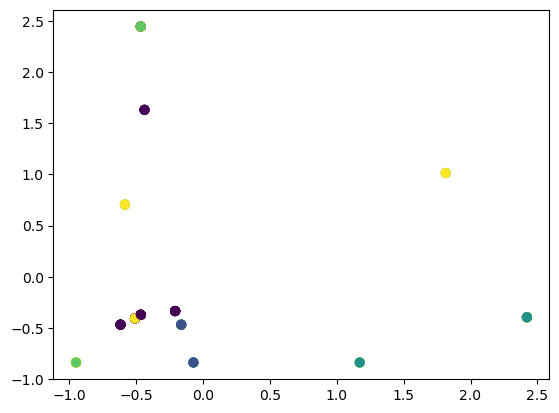

In [3]:
a1=[8,628,68]
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score,adjusted_rand_score
os.chdir(r'C:\Users\chand\OneDrive\Desktop\Kmeans\Clustering_Complete/worddiph/data')
ss=[]
ch=[]
db=[]
cn=[]
ai=[]
bi=[]
for i,j in zip(a1,os.listdir('.')):
    print(i,j)
    df = pd.read_csv(j)
    df.columns = ["d"+str(i) for i in range(i)]
    df.fillna(0,inplace = True)
    X = np.array(df.values)
    print(X.shape)
    for pk in range(2,6):
      
        # Standardize the data
        scaler = StandardScaler()
        X = scaler.fit_transform(df.values)

        # Fit a Gaussian Mixture Model with 4 components
        gmm = GaussianMixture(n_components=pk, random_state=42,tol=1e-8,verbose=2,verbose_interval=10)
        gmm.fit(X)

        # Predict the cluster labels for each data point
        labels = gmm.predict(X)
        print(gmm)

        a=silhouette_score(X, labels)
        b=calinski_harabasz_score(X, labels)
        c=davies_bouldin_score(X, labels)
        d=gmm.bic(X)
        e=gmm.aic(X)
        # Predict the cluster labels for each data point
        labels = gmm.predict(X)
        from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score,adjusted_rand_score
        print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
        print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
        print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
        print("BIC: %0.3f" % gmm.bic(X))
        print("AIC: %0.3f" % gmm.aic(X))
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
        #plt.tight_layout()
        ss.append(silhouette_score(X, labels))
        ch.append(calinski_harabasz_score(X, labels))
        db.append(davies_bouldin_score(X, labels))
        bi.append(gmm.bic(X))
        ai.append(gmm.aic(X))
        cn.append(pk)

In [4]:
df=pd.DataFrame([cn,ss,ch,db,bi,ai])
df=df.T
df.columns=['Cluster_number','Silhouette_Coefficient','Calinski_Harabasz','Davies_Bouldin','AIC','BIC']
df.to_csv('gmm_worddiph.csv')

In [5]:
pwd

'C:\\Users\\chand\\OneDrive\\Desktop\\Kmeans\\Clustering_Complete\\worddiph\\data'

In [6]:
data=pd.read_csv(r'C:\Users\chand\OneDrive\Desktop\Kmeans\Clustering_Complete/worddiph/data\gmm_worddiph.csv')

In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
splot=data.groupby(["Data",])["Cluster_number","Silhouette_Coefficient","Calinski_Harabasz","Davies_Bouldin","AIC","BIC"].plot(kind = "bar",width=0.9);
plt.ylabel("Accuracy")

KeyError: 'Data'